In [88]:
!pip install -U imbalanced-learn

# Importing packages - Pandas, Numpy, Seaborn, Scipy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm

np.random.seed(0)

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
path = "/content/drive/MyDrive/Colab/Ass2//online_shoppers_intention.csv"

In [91]:
# Reading the data as dataframe and print the first five rows
shop = pd.read_csv(path)
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Get info of the dataframe columns
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# gives us statistical info about the numerical variables. 
shop.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


,Total,Percent
Administrative,0,0.0
Administrative_Duration,0,0.0
Weekend,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0


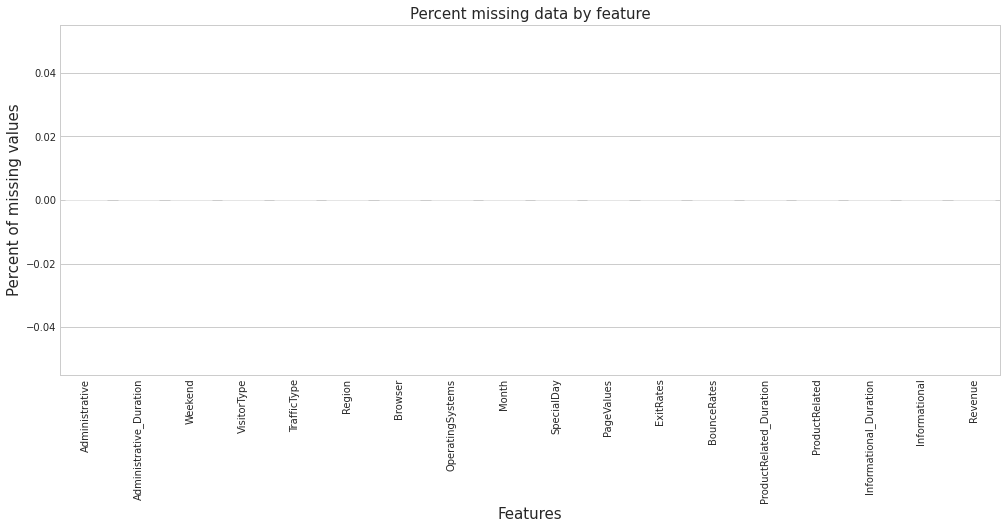

In [ ]:
#check percent and total  missing data

total = shop.isnull().sum().sort_values(ascending=False)
percent = (shop.isnull().sum()/shop.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Text(0.5, 1.0, 'Outlier in Zip Code')

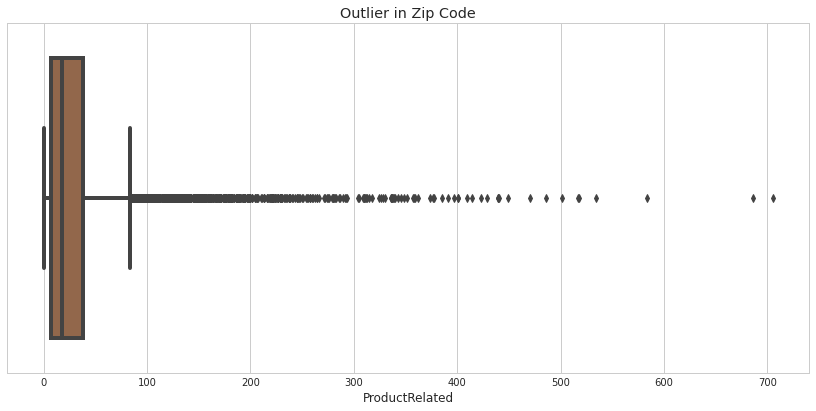

In [ ]:
# Checking the outlier in ZIP Code
display(shop[shop['ProductRelated'] < 10000])
plt.figure(figsize = (12.8 , 6))
sns.boxplot(shop['ProductRelated'], palette = 'copper').set_title('Outlier in Zip Code')

In [ ]:
# Checking count of negative values in Experience
shop.loc[shop['ProductRelated'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Administrative_Duration,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Informational,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Informational_Duration,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductRelated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductRelated_Duration,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BounceRates,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExitRates,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PageValues,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpecialDay,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation
* There are multiple types of features. 
* Some features have missing values. 
* Most of the features are object( includes string values in the variable).

I want to focus on the target variable which is **SalePrice.** Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression. I will explain more on this later.

### SalePrice vs OverallQual

Text(0, 0.5, 'SpecialDay')

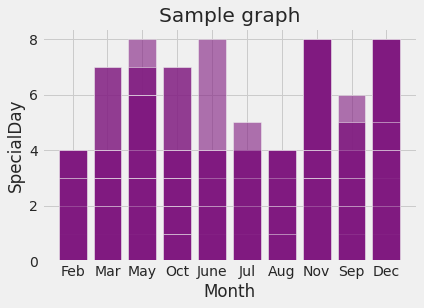

In [94]:
plt.bar(shop["Month"],shop["OperatingSystems"],color=(0.5,0.1,0.5,0.6))
plt.title('Sample graph')
plt.xlabel('Month')
plt.ylabel('OperatingSystems')

### SalePrice vs OverallQual

Text(0, 0.5, 'SpecialDay')

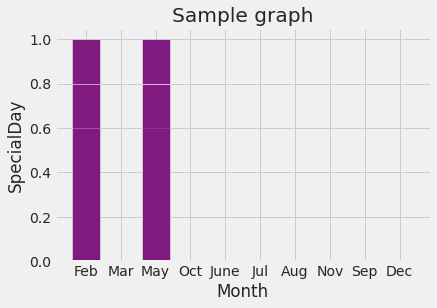

In [95]:
plt.bar(shop["Month"],shop["SpecialDay"],color=(0.5,0.1,0.5,0.6))
plt.title('Sample graph')
plt.xlabel('Month')
plt.ylabel('SpecialDay')

### SalePrice vs OverallQual

Text(0, 0.5, 'Browser')

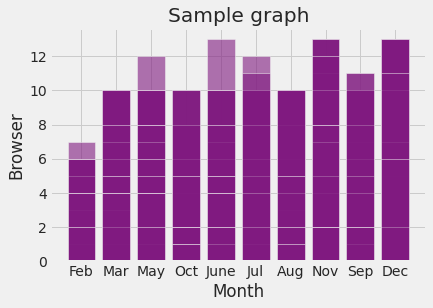

In [96]:
# Distribution of Income by Personal Loan
plt.bar(shop["Month"],shop["Browser"],color=(0.5,0.1,0.5,0.6))
plt.title('Sample graph')
plt.xlabel('Month')
plt.ylabel('Browser')

### SalePrice vs OverallQual

Text(0, 0.5, 'Region')

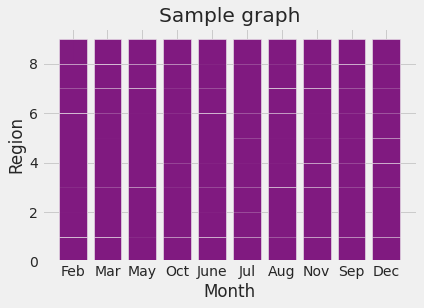

In [97]:

plt.bar(shop["Month"],shop["Region"],color=(0.5,0.1,0.5,0.6))
plt.title('Sample graph')
plt.xlabel('Month')
plt.ylabel('Region')

### SalePrice vs OverallQual

Text(0, 0.5, 'TrafficType')

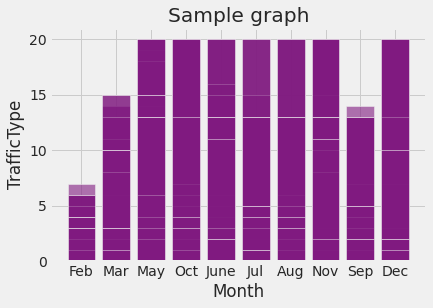

In [98]:
plt.bar(shop["Month"],shop["TrafficType"],color=(0.5,0.1,0.5,0.6))
plt.title('Sample graph')
plt.xlabel('Month')
plt.ylabel('TrafficType')